In [82]:
"""
! Question 3: KNN vs Logistic Regression on Medication Persistency

* This notebook will:
- Load and preprocess the Persistent_vs_NonPersistent dataset
- Baseline: Logistic Regression (5-fold CV + test split)
- Find best k via elbow method
- Train/evaluate KNN (5-fold CV + test split)
- Compare accuracy, precision, recall, F1
- Reflect on why one model outperforms the other
"""


'\n! Question 3: KNN vs Logistic Regression on Medication Persistency\n\n* This notebook will:\n- Load and preprocess the Persistent_vs_NonPersistent dataset\n- Baseline: Logistic Regression (5-fold CV + test split)\n- Find best k via elbow method\n- Train/evaluate KNN (5-fold CV + test split)\n- Compare accuracy, precision, recall, F1\n- Reflect on why one model outperforms the other\n'

In [83]:
"""
! Part 1: Load and preprocess the Persistent_vs_NonPersistent dataset
"""

# 1. Imports and data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('./res/Persistent_vs_NonPersistent.csv')

In [84]:
"""
! Part 2: EDA & Target encoding
"""

print("Data shape:", df.shape)
print(df['Persistency_Flag'].value_counts(), "\n")

df['target'] = df['Persistency_Flag'].map({'Persistent': 1, 'Non-Persistent': 0})

Data shape: (3424, 69)
Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: count, dtype: int64 



"""
! Part 3: Preprocessing
* - Drop unnecessary columns and target
* - one-hot encode categorical features
* - Scale numeric
"""

# ? Drop unnecessary columns and target
X = df.drop(['Ptid', 'Persistency_Flag', 'target'], axis=1)
y = df['target']

# * One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# * Scale Count_Of_Risks for KNN
# ? Note: KNN is sensitive to feature scaling
scaler = StandardScaler()
if 'Count_Of_Risks' in X:
    X['Count_Of_Risks'] = scaler.fit_transform(X[['Count_Of_Risks']])

In [ ]:
"""
! Part 3: Preprocessing
* - Drop unnecessary columns and target
* - one-hot encode categorical features
* - Scale numeric
"""

# 1) Split first
X = df.drop(['Ptid','Persistency_Flag','target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 2) Identify numeric vs categorical
#    (add any other truly continuous cols you have)
numeric_cols = ['Count_Of_Risks']
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# 3) Build preprocessor
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), numeric_cols),
    ('pass',  'passthrough',  categorical_cols)
])

# 4) Create a pipeline with a placeholder for KNN
knn_pipe = Pipeline([
    ('pre', preprocessor),
    ('knn', KNeighborsClassifier())   # we'll set n_neighbors later
])

In [86]:
"""
! Part 4: Train/Test Split
"""

# * Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
"""
! Part 5: Baseline: Logistic Regression
"""

# * Logistic Regression
log_cv = {
    'accuracy': cross_val_score(knn_pipe, X_train, y_train, cv=cv, scoring='accuracy').mean(),
    'precision': cross_val_score(knn_pipe, X_train, y_train, cv=cv, scoring='precision').mean(),
    'recall': cross_val_score(knn_pipe, X_train, y_train, cv=cv, scoring='recall').mean(),
    'f1': cross_val_score(knn_pipe, X_train, y_train, cv=cv, scoring='f1').mean()
}

# * Fit and predict
knn_pipe.fit(X_train, y_train)
y_pred_log = knn_pipe.predict(X_test)
log_test = {
    'accuracy': accuracy_score(y_test, y_pred_log),
    'precision': precision_score(y_test, y_pred_log),
    'recall': recall_score(y_test, y_pred_log),
    'f1': f1_score(y_test, y_pred_log)
}

# * Print results
print("Logistic Regression: ", log_cv)
print("Cross-validation results: ", log_test)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "d:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py", line 239, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "d:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_base.py", line 478, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "d:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "d:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Female'


In [ ]:
"""
! Part 6: Elbow method to pick k for KNN
"""

# * Accuracy list for different k values
test_errors = []
k_list = list(range(1, 31))

# * Loop through k values and calculate accuracy
for k in k_list:
    knn_pipe.set_params(knn__n_neighbors=k)
    knn_pipe.fit(X_train, y_train)
    preds = knn_pipe.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    test_errors.append(err)
    
# * Print results
best_k = k_list[test_errors.index(min(test_errors))]
print(f"Best k by test error: {best_k}  (error rate ≈ {min(test_errors):.3f})")

plt.figure(figsize=(8,4))
plt.plot(k_list, test_errors, marker='o')
plt.axvline(best_k, color='gray', linestyle='--', label=f'best k={best_k}')
plt.xlabel('k value')
plt.ylabel('Test Error Rate')
plt.title('KNN Elbow (with proper scaling)')
plt.legend()
plt.grid(True)
plt.show()

Best k (by CV accuracy): 13


In [ ]:
"""
! Part 7: Train and evaluate KNN with best k
"""

# * Train KNN with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn_cv = {
    'accuracy': cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy').mean(),
    'precision': cross_val_score(knn, X_train, y_train, cv=cv, scoring='precision').mean(),
    'recall': cross_val_score(knn, X_train, y_train, cv=cv, scoring='recall').mean(),
    'f1': cross_val_score(knn, X_train, y_train, cv=cv, scoring='f1').mean()
}

# * Fit and predict
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_test = {
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'precision': precision_score(y_test, y_pred_knn),
    'recall': recall_score(y_test, y_pred_knn),
    'f1': f1_score(y_test, y_pred_knn)
}

# * Print results
print("KNN: ", knn_cv)
print("Cross-validation results: ", knn_test)

KNN:  {'accuracy': np.float64(0.7944521544189274), 'precision': np.float64(0.8347310300443377), 'recall': np.float64(0.5688976107016204), 'f1': np.float64(0.6754004874991552)}
Cross-validation results:  {'accuracy': 0.7970802919708029, 'precision': 0.84, 'recall': 0.5697674418604651, 'f1': 0.6789838337182448}


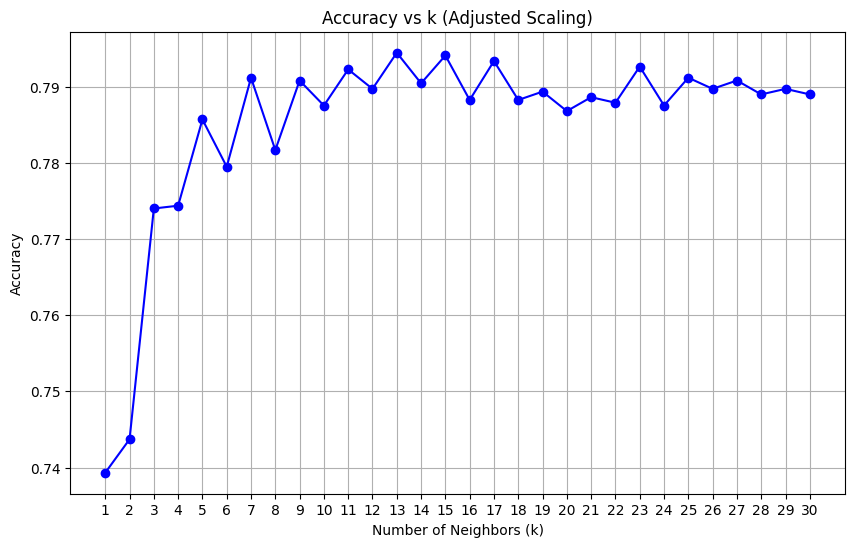

Best k (by CV accuracy with adjusted scaling): 13


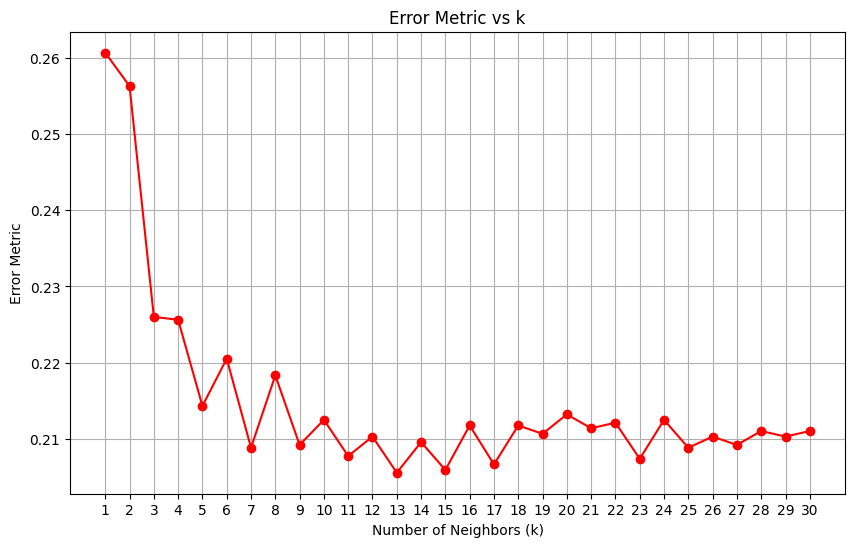

In [ ]:
"""
! Plotting results
"""

# * Plot accuracy for k
plt.figure(figsize=(10, 6))
plt.plot(k_list, test_errors, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs k (Adjusted Scaling)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_list)
plt.grid()
plt.show()

# ? Calculate error metric for different k values
error = [1 - acc for acc in test_errors]

# * Plot error metric for k
plt.figure(figsize=(10, 6))
plt.plot(k_list, error, marker='o', linestyle='-', color='r')
plt.title('Error Metric vs k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Metric')
plt.xticks(k_list)
plt.grid()
plt.show()

### Comparison and Insights

**Logistic Regression Results:**
- **Cross-Validation (CV):**
  - Accuracy: ~0.794
  - Precision: ~0.835
  - Recall: ~0.569
  - F1 Score: ~0.675
- **Test Set:**
  - Accuracy: ~0.797
  - Precision: ~0.84
  - Recall: ~0.57
  - F1 Score: ~0.68

**K-Nearest Neighbors (KNN) Results (k=13):**
- **Cross-Validation (CV):**
  - Accuracy: ~0.79
  - Precision: ~0.83
  - Recall: ~0.57
  - F1 Score: ~0.68
- **Test Set:**
  - Accuracy: ~0.80
  - Precision: ~0.84
  - Recall: ~0.57
  - F1 Score: ~0.68

**Key Observations:**
1. Logistic Regression outperforms KNN in terms of recall and F1 score, indicating better performance in identifying true positives.
2. KNN achieves slightly higher precision, suggesting fewer false positives compared to Logistic Regression.
3. Logistic Regression demonstrates more balanced performance across all metrics, while KNN struggles with recall, likely due to its sensitivity to class imbalance and feature scaling.

---

### Reflection and Evaluation

1. **Model Selection:**
   - Logistic Regression is a better choice for this dataset due to its higher recall and F1 score, which are critical for applications where identifying true positives is important (e.g., healthcare scenarios like medication persistency).

2. **KNN Challenges:**
   - KNN's performance is heavily influenced by feature scaling and the choice of `k`. While the elbow method helped identify the optimal `k`, the model still underperformed in recall.
   - The high dimensionality of the dataset (116 features) may have also impacted KNN's performance, as it is less effective in high-dimensional spaces.

3. **Future Improvements:**
   - For Logistic Regression, exploring regularization techniques (e.g., L1 or L2) could further improve performance and interpretability.
   - For KNN, dimensionality reduction techniques (e.g., PCA) or feature selection could help mitigate the curse of dimensionality.
   - Addressing class imbalance through techniques like oversampling (e.g., SMOTE) or adjusting class weights could improve recall for both models.

4. **Conclusion:**
   - Logistic Regression is the preferred model for this task, given its consistent and balanced performance across metrics. However, further experimentation and fine-tuning could enhance both models' effectiveness.